In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
# TensorFlow and tf.keras
import tensorflow as tf
print(tf.__version__)
import random
random.seed(12345)
tf.random.set_seed(12345)

import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib

2.6.0


In [4]:
train_data_dir = pathlib.Path("Covid-Model_dataset/Train")
test_data_dir = pathlib.Path("Covid-Model_dataset/Test")

In [5]:
image_count = len(list(train_data_dir.glob('*/*')))
print(image_count)

320


In [4]:
batch_size = 32
img_height = 512
img_width = 512

In [5]:
!rm -rf Covid-Model_dataset/Train/.ipynb_checkpoints
!rm -rf Covid-Model_dataset/Test/.ipynb_checkpoints

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  color_mode="rgb",
  label_mode="binary",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 320 files belonging to 2 classes.
Using 256 files for training.


2021-09-12 17:03:47.194132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-12 17:03:47.202868: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-12 17:03:47.203491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-12 17:03:47.205058: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [1]:
train_ds.shape

NameError: name 'train_ds' is not defined

In [6]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  color_mode="rgb",
  label_mode="binary",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 320 files belonging to 2 classes.
Using 64 files for validation.


In [7]:
print(train_ds.class_names)
print(validation_ds.class_names)
class_names=['normal', 'positive']

['normal', 'positive']
['normal', 'positive']


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  color_mode="rgb",
  label_mode="binary",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 72 files belonging to 2 classes.


In [9]:
print(test_ds.class_names)

['normal', 'positive']


2021-09-12 17:04:04.725407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


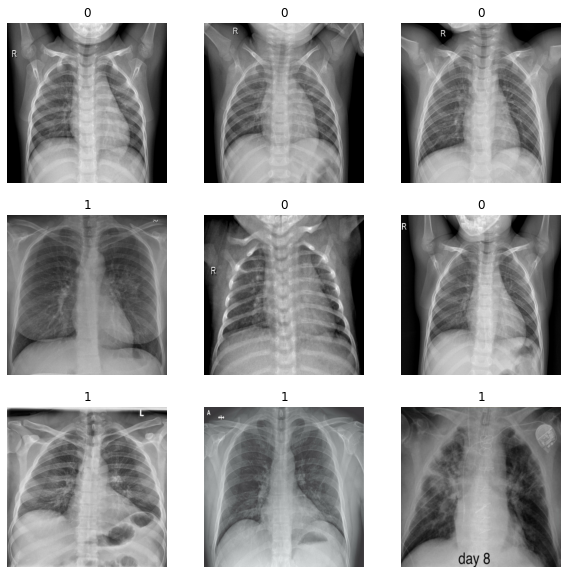

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [16]:
model0 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model0.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['binary_accuracy'])
history0=model0.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=10,
  batch_size=batch_size
)
test_loss, test_acc = model0.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
8/8 [==============================] - 4s 273ms/step - loss: 35589.6016 - binary_accuracy: 0.6055 - val_loss: 12049.9795 - val_binary_accuracy: 0.5938
Epoch 2/10
8/8 [==============================] - 3s 260ms/step - loss: 4466.5190 - binary_accuracy: 0.8203 - val_loss: 1529.2955 - val_binary_accuracy: 0.7812
Epoch 3/10
8/8 [==============================] - 3s 263ms/step - loss: 710.7434 - binary_accuracy: 0.9336 - val_loss: 515.7495 - val_binary_accuracy: 0.9531
Epoch 4/10
8/8 [==============================] - 3s 264ms/step - loss: 676.0125 - binary_accuracy: 0.9414 - val_loss: 82.0960 - val_binary_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 3s 262ms/step - loss: 334.3549 - binary_accuracy: 0.9648 - val_loss: 10.7728 - val_binary_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 3s 261ms/step - loss: 153.8339 - binary_accuracy: 0.9844 - val_loss: 115.8193 - val_binary_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] 

In [11]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds_norm = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds_norm = validation_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [13]:
model1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model1.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['binary_accuracy'])
history1=model1.fit(
  train_ds_norm,
  validation_data=validation_ds_norm,
  epochs=10,
  batch_size=batch_size
)
test_loss, test_acc = model1.evaluate(test_ds_norm, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10


2021-09-07 07:11:55.353999: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 [==============================] - 6s 248ms/step - loss: 24.0665 - binary_accuracy: 0.6914 - val_loss: 3.1233 - val_binary_accuracy: 0.8750
Epoch 2/10
8/8 [==============================] - 3s 232ms/step - loss: 2.7656 - binary_accuracy: 0.9102 - val_loss: 0.0778 - val_binary_accuracy: 0.9844
Epoch 3/10
8/8 [==============================] - 3s 231ms/step - loss: 0.3978 - binary_accuracy: 0.9727 - val_loss: 0.2378 - val_binary_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 3s 231ms/step - loss: 0.1510 - binary_accuracy: 0.9805 - val_loss: 0.0751 - val_binary_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 3s 231ms/step - loss: 0.1236 - binary_accuracy: 0.9883 - val_loss: 0.1019 - val_binary_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 3s 229ms/step - loss: 0.0624 - binary_accuracy: 0.9883 - val_loss: 0.0883 - val_binary_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 3s 230ms/step - loss: 0.0305 - binar

In [14]:
model2 = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  #tf.keras.layers.Resizing(400,400),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model2.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['binary_accuracy'])
history2=model2.fit(
  train_ds_norm,
  validation_data=validation_ds_norm,
  epochs=10,
  batch_size=batch_size
)
test_loss, test_acc = model2.evaluate(test_ds_norm, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
8/8 [==============================] - 4s 246ms/step - loss: 10.2784 - binary_accuracy: 0.6055 - val_loss: 0.7564 - val_binary_accuracy: 0.5938
Epoch 2/10
8/8 [==============================] - 3s 236ms/step - loss: 0.4613 - binary_accuracy: 0.8555 - val_loss: 0.4635 - val_binary_accuracy: 0.7031
Epoch 3/10
8/8 [==============================] - 3s 233ms/step - loss: 0.1631 - binary_accuracy: 0.9609 - val_loss: 0.0875 - val_binary_accuracy: 0.9688
Epoch 4/10
8/8 [==============================] - 3s 235ms/step - loss: 0.1226 - binary_accuracy: 0.9570 - val_loss: 0.0415 - val_binary_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 3s 237ms/step - loss: 0.0480 - binary_accuracy: 0.9766 - val_loss: 0.6308 - val_binary_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 3s 238ms/step - loss: 0.1338 - binary_accuracy: 0.9375 - val_loss: 0.0181 - val_binary_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 3s 235ms/step - loss: 0.0

In [15]:
model3 = tf.keras.Sequential([
  #tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  #tf.keras.layers.Resizing(400,400),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model3.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['binary_accuracy'])
history3=model3.fit(
  train_ds_norm,
  validation_data=validation_ds_norm,
  epochs=10,
  batch_size=batch_size
)
test_loss, test_acc = model3.evaluate(test_ds_norm, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
8/8 [==============================] - 4s 247ms/step - loss: 1.2210 - binary_accuracy: 0.5938 - val_loss: 0.3121 - val_binary_accuracy: 0.9375
Epoch 2/10
8/8 [==============================] - 3s 235ms/step - loss: 0.1847 - binary_accuracy: 0.9648 - val_loss: 0.0487 - val_binary_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 3s 235ms/step - loss: 0.0549 - binary_accuracy: 0.9805 - val_loss: 1.1438 - val_binary_accuracy: 0.5000
Epoch 4/10
8/8 [==============================] - 3s 238ms/step - loss: 0.1512 - binary_accuracy: 0.9297 - val_loss: 0.0216 - val_binary_accuracy: 0.9844
Epoch 5/10
8/8 [==============================] - 3s 241ms/step - loss: 0.1652 - binary_accuracy: 0.9375 - val_loss: 0.2360 - val_binary_accuracy: 0.9062
Epoch 6/10
8/8 [==============================] - 3s 237ms/step - loss: 0.0985 - binary_accuracy: 0.9609 - val_loss: 0.0107 - val_binary_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 3s 239ms/step - loss: 0.05

In [22]:
test_labels = np.concatenate([y for x, y in test_ds_norm], axis=0)

predictions = model2.predict(test_ds_norm)

score = predictions[0]
print(
    "This image is %.2f percent Normal and %.2f percent Covid."
    % (100 * (1 - score), 100 * score)
)
#logit=model.predict(test_ds_norm)
#predicted=predictions.argmax(axis=-1)

#predicted = tf.round(tf.nn.sigmoid(logit))
predicted = tf.round(predictions)
#logit
#tf.keras.metrics.confusion_matrix(test_labels, predictions)

This image is 100.00 percent Normal and 0.00 percent Covid.


In [17]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()

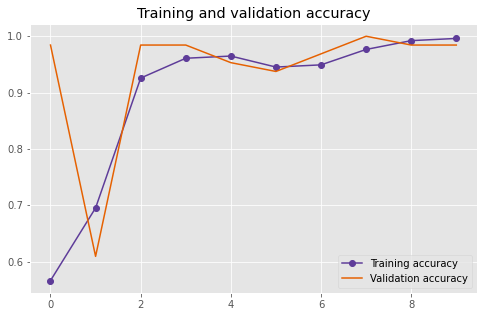

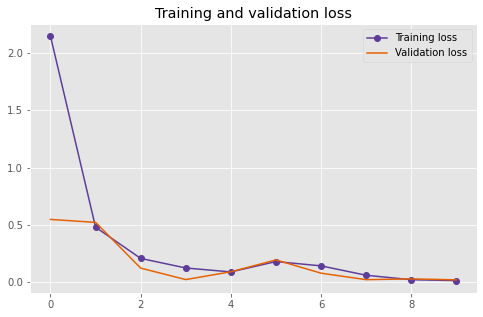

In [49]:
plot_train_curve(history)

In [17]:
predections=model2.predict(test_ds_norm)

In [18]:
predicted=tf.round(predections)

In [30]:
#predections.shape
test_labels.shape

(72, 1)

In [32]:
tf.math.confusion_matrix(test_labels,predections,num_classes=2)

InvalidArgumentError: Dimensions [0,2) of indices[shape=[72,2,1]] must match dimensions [0,2) of updates[shape=[72,1]] [Op:ScatterNd]

[[20 16]
 [15 21]]
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.56        36
         1.0       0.57      0.58      0.58        36

    accuracy                           0.57        72
   macro avg       0.57      0.57      0.57        72
weighted avg       0.57      0.57      0.57        72



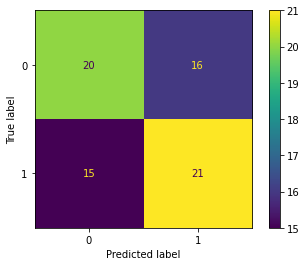

In [21]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cnf_matrix = confusion_matrix(test_labels, predicted)
print(cnf_matrix)
cf_report = classification_report(test_labels, predicted)
print(cf_report)

# plot_confusion_matrix(cnf_matrix,X_test,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()
plt.show()

In [12]:
def model_builder(hp):
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  #hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Float('learning_rate', min_value=1e-5,max_value=1e-2,sampling='LOG',default=1e-3 )

  filters1=hp.Choice('num_filters1',values=[32, 64],default=64)
  filters2=hp.Choice('num_filters2',values=[32, 64],default=64)
  activation1=hp.Choice('activation1',values=['relu', 'tanh', 'sigmoid'],default='relu')
  activation2=hp.Choice('activation2',values=['relu', 'tanh', 'sigmoid'],default='relu')

  #drop1=hp.Float('rate1', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
  #drop2=hp.Float('rate2', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
  #drop3=hp.Float('rate3', min_value=0.0, max_value=0.5, default=0.25, step=0.05)
    
  #pool_size1 = hp.Int('pool_size1', min_value=4, max_value=32, step=2)
  #pool_size2 = hp.Int('pool_size2', min_value=4, max_value=10, step=2)

  kernel_size1 = hp.Int('kernel_size1', min_value=10, max_value=32, step=2)
  kernel_size2 = hp.Int('kernel_size2', min_value=2, max_value=10, step=2)

  model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters=filters1, kernel_size=kernel_size1, padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Conv2D(filters=filters2, kernel_size=kernel_size2, padding='same', activation='relu'),
          tf.keras.layers.MaxPooling2D(),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(units=hp_units1, activation=activation1),
          tf.keras.layers.Dense(1,activation='sigmoid')
        #tf.keras.layers.RandomFlip(mode="horizontal",input_shape=(28,28,1)),
    ])
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss="binary_crossentropy",
      metrics=['binary_accuracy'])


  return model

import keras_tuner as kt
tuner = kt.Hyperband(model_builder,
                     objective='val_binary_accuracy',
                     max_epochs=20,
                     factor=3,
                     directory='project_run1',
                     project_name='project')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_ds_norm, validation_data=validation_ds_norm, epochs=20, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 11m 23s]
val_binary_accuracy: 1.0

Best val_binary_accuracy So Far: 1.0
Total elapsed time: 01h 36m 11s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.00012161758629574135.



In [20]:
print(f"""
First Convolution Layer  Filter :{best_hps.get('num_filters1')}, Kernel :{best_hps.get('kernel_size1')}
Second Convolution Layer  Filter :{best_hps.get('num_filters2')}, Kernel :{best_hps.get('kernel_size2')}
The optimal number of units in the first densely-connected layer is {best_hps.get('units1')}, activation:  {best_hps.get('activation1')}
the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}
""")


First Convolution Layer  Filter :64, Kernel :14
Second Convolution Layer  Filter :32, Kernel :4
The optimal number of units in the first densely-connected layer is 224, activation:  relu
the optimal learning rate for the optimizer is 0.00012161758629574135



In [18]:
# Retrain the model
final_model = tuner.hypermodel.build(best_hps)
history_final = final_model.fit(train_ds_norm, validation_data=validation_ds_norm, epochs=10)

val_acc_per_epoch = history_final.history['val_binary_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/10
8/8 [==============================] - 7s 742ms/step - loss: 1.3611 - binary_accuracy: 0.5703 - val_loss: 0.4346 - val_binary_accuracy: 0.9844
Epoch 2/10
8/8 [==============================] - 7s 736ms/step - loss: 0.2555 - binary_accuracy: 0.9531 - val_loss: 0.0655 - val_binary_accuracy: 0.9844
Epoch 3/10
8/8 [==============================] - 7s 736ms/step - loss: 0.1606 - binary_accuracy: 0.9258 - val_loss: 0.0431 - val_binary_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 7s 729ms/step - loss: 0.0948 - binary_accuracy: 0.9688 - val_loss: 0.0215 - val_binary_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 7s 723ms/step - loss: 0.0335 - binary_accuracy: 0.9883 - val_loss: 0.0196 - val_binary_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 7s 721ms/step - loss: 0.0288 - binary_accuracy: 0.9883 - val_loss: 0.0182 - val_binary_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 7s 714ms/step - loss: 0.02

In [19]:
eval_result = final_model.evaluate(test_ds,verbose=2)
print("[test loss, test accuracy]:", eval_result)

3/3 - 2s - loss: 20.0167 - binary_accuracy: 0.9583
[test loss, test accuracy]: [20.01668357849121, 0.9583333134651184]


In [22]:
model5 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, 14, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 4, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(224, activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model5.compile(
  optimizer='adam',
  loss="binary_crossentropy",
  metrics=['binary_accuracy'])
history5=model5.fit(
  train_ds_norm,
  validation_data=validation_ds_norm,
  epochs=20,
  batch_size=batch_size
)
test_loss, test_acc = model5.evaluate(test_ds_norm, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/20
8/8 [==============================] - 7s 650ms/step - loss: 8.0856 - binary_accuracy: 0.4844 - val_loss: 2.4571 - val_binary_accuracy: 0.5938
Epoch 2/20
8/8 [==============================] - 6s 636ms/step - loss: 0.9521 - binary_accuracy: 0.4883 - val_loss: 0.6562 - val_binary_accuracy: 0.4062
Epoch 3/20
8/8 [==============================] - 6s 636ms/step - loss: 0.5389 - binary_accuracy: 0.5508 - val_loss: 0.5080 - val_binary_accuracy: 0.6719
Epoch 4/20
8/8 [==============================] - 6s 642ms/step - loss: 0.4062 - binary_accuracy: 0.8945 - val_loss: 0.4502 - val_binary_accuracy: 0.9844
Epoch 5/20
8/8 [==============================] - 6s 643ms/step - loss: 0.3891 - binary_accuracy: 0.9180 - val_loss: 0.4396 - val_binary_accuracy: 0.9844
Epoch 6/20
8/8 [==============================] - 6s 634ms/step - loss: 0.3862 - binary_accuracy: 0.9570 - val_loss: 0.4230 - val_binary_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 6s 631ms/step - loss: 0.35